In [ ]:
import numpy as np
import pandas as pd
#from sklearn.linear_model import LogisticRegression - using statsmodels because that produces a readable summary of coefs etc.
from statsmodels.api import Logit, add_constant
from sklearn import metrics
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\stuar\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\stuar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\stuar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [ ]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=labels,
                yticklabels=labels,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    return matrix

def player_list(features_df,game_id):
# the two arguments are the full features dataframe as generated by the pipeline, before paring down to only actual model features 
# and the index in that dataframe for the desired game
    game_df = features_df.iloc[game_id]
    print("Home 1: {:30} Road 1: {}".format(game_df['HOME_PLAYER_1_PLAYER_NAME'],game_df['ROAD_PLAYER_1_PLAYER_NAME']))
    print("Home 2: {:30} Road 2: {}".format(game_df['HOME_PLAYER_2_PLAYER_NAME'],game_df['ROAD_PLAYER_2_PLAYER_NAME']))
    print("Home 3: {:30} Road 3: {}".format(game_df['HOME_PLAYER_3_PLAYER_NAME'],game_df['ROAD_PLAYER_3_PLAYER_NAME']))
    print("Home 4: {:30} Road 4: {}".format(game_df['HOME_PLAYER_4_PLAYER_NAME'],game_df['ROAD_PLAYER_4_PLAYER_NAME']))
    print("Home 5: {:30} Road 5: {}".format(game_df['HOME_PLAYER_5_PLAYER_NAME'],game_df['ROAD_PLAYER_5_PLAYER_NAME']))
    print("Home 6: {:30} Road 6: {}".format(game_df['HOME_PLAYER_6_PLAYER_NAME'],game_df['ROAD_PLAYER_6_PLAYER_NAME']))
    print("Home 7: {:30} Road 7: {}".format(game_df['HOME_PLAYER_7_PLAYER_NAME'],game_df['ROAD_PLAYER_7_PLAYER_NAME']))
    print("Home 8: {:30} Road 8: {}".format(game_df['HOME_PLAYER_8_PLAYER_NAME'],game_df['ROAD_PLAYER_8_PLAYER_NAME']))

    

In [ ]:
#DATA_PATH = '/content/drive/MyDrive/capstone/data'
DATA_PATH = 'C:/Users/stuar/OneDrive/Documents/Capstone/data'

In [ ]:
features_df = pd.read_csv(DATA_PATH + '/features_df_final.csv')
features_df['date'] = pd.to_datetime(features_df['GAME_DATE'])

In [ ]:
features_df

,GAME_DATE,HOME_PLAYER_1_POSS,HOME_PLAYER_1_TS_PCT,HOME_PLAYER_1_FG_PCT,HOME_PLAYER_1_FG3_PCT,HOME_PLAYER_1_FT_PCT,HOME_PLAYER_1_MIN_SAVG,HOME_PLAYER_1_POSS_SAVG,HOME_PLAYER_1_OREB_PAVG,HOME_PLAYER_1_DREB_PAVG,...,ROAD_TEAM_PTS_FB_PAVG_BENCH,ROAD_TEAM_PTS_PAINT_PAVG_BENCH,ROAD_TEAM_OPP_PTS_OFF_TOV_PAVG_BENCH,ROAD_TEAM_OPP_PTS_2ND_CHANCE_PAVG_BENCH,ROAD_TEAM_OPP_PTS_FB_PAVG_BENCH,ROAD_TEAM_OPP_PTS_PAINT_PAVG_BENCH,ROAD_TEAM_BLKA_PAVG_BENCH,ROAD_TEAM_PFD_PAVG_BENCH,SEASON_ID,date
0,2000-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,2000-10-31
1,2000-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,2000-10-31
2,2000-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,2000-10-31
3,2000-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,2000-10-31
4,2000-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,2000-10-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25155,2021-05-16,4426.0,59.039270,43.880326,34.263959,88.745387,34.004839,71.387097,0.008586,0.046091,...,0.001482,0.006038,0.018828,0.014354,0.017593,0.056923,0.000878,0.004007,2020,2021-05-16
25156,2021-05-16,4885.0,52.084927,41.596639,32.485323,77.153558,32.056103,68.802817,0.012078,0.056704,...,0.003494,0.006704,0.012527,0.011817,0.010169,0.038006,0.000369,0.002500,2020,2021-05-16
25157,2021-05-16,3798.0,48.851432,36.824877,33.548387,74.814815,27.568490,59.343750,0.006582,0.048973,...,0.001825,0.007530,0.014917,0.012607,0.010610,0.044494,0.001055,0.003508,2020,2021-05-16
25158,2021-05-16,1890.0,52.211582,45.609756,28.282828,86.153846,15.011944,31.500000,0.005820,0.045503,...,0.001874,0.010462,0.018995,0.013568,0.016645,0.053543,0.001035,0.004084,2020,2021-05-16


In [ ]:
player_list(features_df,24954)

Home 1: Collin Sexton                  Road 1: Garrett Temple
Home 2: Darius Garland                 Road 2: Coby White
Home 3: Isaac Okoro                    Road 3: Patrick Williams
Home 4: Kevin Love                     Road 4: Daniel Theis
Home 5: Jarrett Allen                  Road 5: Nikola Vucevic
Home 6: Larry Nance Jr.                Road 6: Thaddeus Young
Home 7: Taurean Prince                 Road 7: Tomas Satoransky
Home 8: Dean Wade                      Road 8: Lauri Markkanen


In [ ]:
features_df[features_df['GAME_DATE'] == '2021-04-29'][['ROAD_PLAYER_3_PLAYER_NAME','ROAD_PLAYER_4_PLAYER_NAME']]

,ROAD_PLAYER_3_PLAYER_NAME,ROAD_PLAYER_4_PLAYER_NAME
25011,Draymond Green,Andrew Wiggins
25012,Joe Harris,Kevin Durant
25013,Tim Hardaway Jr.,Kristaps Porzingis
25014,Zion Williamson,Brandon Ingram
25015,Khris Middleton,Giannis Antetokounmpo
25016,OG Anunoby,Pascal Siakam


In [ ]:
features_df.shape

(25160, 876)

In [ ]:
features_df.describe()

,HOME_PLAYER_1_POSS,HOME_PLAYER_1_TS_PCT,HOME_PLAYER_1_FG_PCT,HOME_PLAYER_1_FG3_PCT,HOME_PLAYER_1_FT_PCT,HOME_PLAYER_1_MIN_SAVG,HOME_PLAYER_1_POSS_SAVG,HOME_PLAYER_1_OREB_PAVG,HOME_PLAYER_1_DREB_PAVG,HOME_PLAYER_1_REB_PAVG,...,ROAD_TEAM_PTS_2ND_CHANCE_PAVG_BENCH,ROAD_TEAM_PTS_FB_PAVG_BENCH,ROAD_TEAM_PTS_PAINT_PAVG_BENCH,ROAD_TEAM_OPP_PTS_OFF_TOV_PAVG_BENCH,ROAD_TEAM_OPP_PTS_2ND_CHANCE_PAVG_BENCH,ROAD_TEAM_OPP_PTS_FB_PAVG_BENCH,ROAD_TEAM_OPP_PTS_PAINT_PAVG_BENCH,ROAD_TEAM_BLKA_PAVG_BENCH,ROAD_TEAM_PFD_PAVG_BENCH,SEASON_ID
count,24792.000000,24791.000000,24791.000000,24679.000000,24654.000000,24792.000000,24792.000000,24792.000000,24792.000000,24792.000000,...,24865.000000,24865.000000,24865.000000,24865.000000,24865.000000,24865.000000,24865.000000,24865.000000,24865.000000,25160.000000
mean,2202.433003,53.264606,43.156119,34.133742,80.390056,31.033912,61.915388,0.010571,0.044544,0.055086,...,0.002500,0.002170,0.007355,0.017038,0.013617,0.013256,0.042265,0.000882,0.003185,2009.902583
std,1429.900485,5.749179,4.926353,9.429729,9.435610,6.231180,12.422389,0.006168,0.013995,0.016998,...,0.001562,0.001890,0.004725,0.005460,0.004616,0.004800,0.013365,0.000580,0.002776,6.018712
min,3.000000,0.000000,0.000000,0.000000,0.000000,1.233333,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000
25%,1007.000000,50.099480,40.476190,30.769231,75.914240,27.735142,55.296970,0.006618,0.035874,0.044196,...,0.001475,0.000878,0.003926,0.013095,0.010303,0.009833,0.032339,0.000480,0.000846,2005.000000
50%,2013.500000,53.356928,43.270869,35.135135,81.395349,32.293506,64.500000,0.009202,0.042543,0.052375,...,0.002195,0.001674,0.006280,0.016659,0.013234,0.012838,0.041830,0.000762,0.002893,2010.000000
75%,3234.000000,56.733680,45.955287,39.024390,86.324786,35.357290,70.538462,0.013158,0.050530,0.062735,...,0.003212,0.002900,0.009700,0.020536,0.016496,0.016164,0.051684,0.001175,0.004610,2015.000000
max,7149.000000,102.848101,87.500000,100.000000,100.000000,48.233333,98.000000,0.078261,0.177419,0.205128,...,0.019380,0.020755,0.046512,0.057426,0.061966,0.057426,0.098672,0.008282,0.018836,2020.000000


In [ ]:
features_df.columns[:100]

Index(['GAME_DATE', 'HOME_PLAYER_1_POSS', 'HOME_PLAYER_1_TS_PCT',
       'HOME_PLAYER_1_FG_PCT', 'HOME_PLAYER_1_FG3_PCT', 'HOME_PLAYER_1_FT_PCT',
       'HOME_PLAYER_1_MIN_SAVG', 'HOME_PLAYER_1_POSS_SAVG',
       'HOME_PLAYER_1_OREB_PAVG', 'HOME_PLAYER_1_DREB_PAVG',
       'HOME_PLAYER_1_REB_PAVG', 'HOME_PLAYER_1_AST_PAVG',
       'HOME_PLAYER_1_STL_PAVG', 'HOME_PLAYER_1_BLK_PAVG',
       'HOME_PLAYER_1_TOV_PAVG', 'HOME_PLAYER_1_PF_PAVG',
       'HOME_PLAYER_1_PTS_PAVG', 'HOME_PLAYER_1_FTA_PAVG',
       'HOME_PLAYER_1_AST_PCT_ADJ_PAVG', 'HOME_PLAYER_1_AST_RATIO_ADJ_PAVG',
       'HOME_PLAYER_1_OFF_RATING_ADJ_PAVG',
       'HOME_PLAYER_1_DEF_RATING_ADJ_PAVG', 'HOME_PLAYER_1_USG_PCT_ADJ_PAVG',
       'HOME_PLAYER_1_OREB_PCT_ADJ_PAVG', 'HOME_PLAYER_1_DREB_PCT_ADJ_PAVG',
       'HOME_PLAYER_1_REB_PCT_ADJ_PAVG', 'HOME_PLAYER_1_TM_TOV_PCT_ADJ_PAVG',
       'HOME_PLAYER_1_PTS_OFF_TOV_PAVG', 'HOME_PLAYER_1_PTS_2ND_CHANCE_PAVG',
       'HOME_PLAYER_1_PTS_FB_PAVG', 'HOME_PLAYER_1_PTS_PAINT_PAVG'

In [ ]:
features_df['WIN']

0        1.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
25155    1.0
25156    1.0
25157    1.0
25158    1.0
25159    0.0
Name: WIN, Length: 25160, dtype: float64

In [ ]:
min_poss = 200

features_df2 = features_df.drop(features_df.columns[features_df.columns.str.contains('GAME_')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('SEASON_ID')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_PLAYER_NAME')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_MIN_SAVG')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_POSS_SAVG')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_PERCENT_PLAY')], axis=1)

features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_PTS_PAVG')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_REB_PAVG')], axis=1)

features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_FG_PCT')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_FG3_PCT')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_FT_PCT')], axis=1)

features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_AST_RATIO_')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_USG_')], axis=1)

features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('HEIGHT')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('WEIGHT')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('AGE')], axis=1)

features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_AST_PCT_')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('REB_PCT_')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_TM_TOV_PCT_')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_PTS_OFF_TOV_')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_PTS_2ND_CHANCE_')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_PTS_FB_')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_PTS_PAINT_')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_BLKA_')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_PFD')], axis=1)

features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_OFF_RATING')], axis=1)

features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('HOME_PLAYER_8_')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('ROAD_PLAYER_8_')], axis=1)

features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('HOME_PLAYER_9_')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('ROAD_PLAYER_9_')], axis=1)

features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_TEAM_')], axis=1)

print(features_df2.shape)
features_df2 = features_df2[features_df2['HOME_PLAYER_1_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['HOME_PLAYER_2_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['HOME_PLAYER_3_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['HOME_PLAYER_4_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['HOME_PLAYER_5_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['HOME_PLAYER_6_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['HOME_PLAYER_7_POSS'] >= min_poss]
#features_df2 = features_df2[features_df2['HOME_PLAYER_8_POSS'] >= min_poss]
#features_df2 = features_df2[features_df2['HOME_PLAYER_9_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['ROAD_PLAYER_1_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['ROAD_PLAYER_2_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['ROAD_PLAYER_3_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['ROAD_PLAYER_4_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['ROAD_PLAYER_5_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['ROAD_PLAYER_6_POSS'] >= min_poss]
features_df2 = features_df2[features_df2['ROAD_PLAYER_7_POSS'] >= min_poss]
#features_df2 = features_df2[features_df2['ROAD_PLAYER_8_POSS'] >= min_poss]
#features_df2 = features_df2[features_df2['ROAD_PLAYER_9_POSS'] >= min_poss]
print(features_df2.shape)

features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('NUM_GAMES')], axis=1)
features_df2 = features_df2.drop(features_df2.columns[features_df2.columns.str.contains('_POSS')], axis=1)
features_df2 = features_df2.dropna()

print(features_df2.shape)


(25160, 159)
(21046, 159)
(21046, 144)


In [ ]:
features_df2.columns[-100:]

Index(['HOME_PLAYER_3_OREB_PAVG', 'HOME_PLAYER_3_DREB_PAVG',
       'HOME_PLAYER_3_AST_PAVG', 'HOME_PLAYER_3_STL_PAVG',
       'HOME_PLAYER_3_BLK_PAVG', 'HOME_PLAYER_3_TOV_PAVG',
       'HOME_PLAYER_3_PF_PAVG', 'HOME_PLAYER_3_FTA_PAVG',
       'HOME_PLAYER_3_DEF_RATING_ADJ_PAVG', 'ROAD_PLAYER_3_TS_PCT',
       'ROAD_PLAYER_3_OREB_PAVG', 'ROAD_PLAYER_3_DREB_PAVG',
       'ROAD_PLAYER_3_AST_PAVG', 'ROAD_PLAYER_3_STL_PAVG',
       'ROAD_PLAYER_3_BLK_PAVG', 'ROAD_PLAYER_3_TOV_PAVG',
       'ROAD_PLAYER_3_PF_PAVG', 'ROAD_PLAYER_3_FTA_PAVG',
       'ROAD_PLAYER_3_DEF_RATING_ADJ_PAVG', 'HOME_PLAYER_4_TS_PCT',
       'HOME_PLAYER_4_OREB_PAVG', 'HOME_PLAYER_4_DREB_PAVG',
       'HOME_PLAYER_4_AST_PAVG', 'HOME_PLAYER_4_STL_PAVG',
       'HOME_PLAYER_4_BLK_PAVG', 'HOME_PLAYER_4_TOV_PAVG',
       'HOME_PLAYER_4_PF_PAVG', 'HOME_PLAYER_4_FTA_PAVG',
       'HOME_PLAYER_4_DEF_RATING_ADJ_PAVG', 'ROAD_PLAYER_4_TS_PCT',
       'ROAD_PLAYER_4_OREB_PAVG', 'ROAD_PLAYER_4_DREB_PAVG',
       'ROAD_PLAYER_4_AS

In [ ]:
cutoff_date = pd.to_datetime('2014-04-16')
cutoff_date

train = features_df2[features_df2['date'] <= cutoff_date]
test = features_df2[features_df2['date'] > cutoff_date]

x_train = train.drop(['date','WIN'], axis=1)
y_train = train['WIN']
x_test = test.drop(['date','WIN'], axis=1)
y_test = test['WIN']

In [ ]:
x_train.shape

(14162, 142)

In [ ]:
x_test.shape

(6884, 142)

In [ ]:
log_reg = Logit(y_train, add_constant(x_train)).fit()

Optimization terminated successfully.
         Current function value: 0.591853
         Iterations 6


C:\Users\stuar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    WIN   No. Observations:                14162
Model:                          Logit   Df Residuals:                    14019
Method:                           MLE   Df Model:                          142
Date:                Wed, 04 May 2022   Pseudo R-squ.:                  0.1200
Time:                        18:23:00   Log-Likelihood:                -8381.8
converged:                       True   LL-Null:                       -9524.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.9229      1.302     -0.709      0.478      -3.475       1.629
HOME_PLAYER_1_TS_PCT                  0.0166      0.005      3.370      0.001       0.007       0.026
HOME_PLAYER_1_OREB_PAVG              17.3702      4.171      4.165      0.000       9.196      25.545
HOME_PLAYER_1_DREB_PAVG              -0.5190      2.029     -0.256      0.798      -4.496       3.458
HOME_PLAYER_1_AST_PAVG                3.4355      0.974      3.528      0.000       1.527       5.344
HOME_PLAYER_1_STL_PAVG                1.7998      3.317      0.543      0.587      -4.701       8.301
HOME_PLAYER_1_BLK_PAVG               -9.4964      7.623     -1.246      0.213     -24.438       5.445
HOME_PLAYER_1_TOV_PAVG                2.6552      2.761      0.962      0.336      -2.757       8.067
HOME_PLAYER_1_PF_PAVG                -4.5601      2.113     -2.158      0.031      -8.701      -0.419
HOME_PLAYER_1_FTA_PAVG               -0.1233      0.986     -0.125      0.900      -2.056       1.810
HOME_PLAYER_1_DEF_RATING_ADJ_PAVG    -0.0091      0.008     -1.134      0.257      -0.025       0.007
HOME_WIN_LOSS_RATIO                   1.9936      0.226      8.839      0.000       1.552       2.436
ROAD_PLAYER_1_TS_PCT                 -0.0116      0.005     -2.341      0.019      -0.021      -0.002
ROAD_PLAYER_1_OREB_PAVG              -8.4084      4.183     -2.010      0.044     -16.607      -0.209
ROAD_PLAYER_1_DREB_PAVG              -1.2633      2.022     -0.625      0.532      -5.226       2.699
ROAD_PLAYER_1_AST_PAVG               -2.4094      0.961     -2.508      0.012      -4.292      -0.526
ROAD_PLAYER_1_STL_PAVG                1.4478      3.312      0.437      0.662      -5.043       7.939
ROAD_PLAYER_1_BLK_PAVG                6.5399      7.467      0.876      0.381      -8.096      21.176
ROAD_PLAYER_1_TOV_PAVG                3.1803      2.782      1.143      0.253      -2.273       8.634
ROAD_PLAYER_1_PF_PAVG                 3.8407      2.133      1.801      0.072      -0.339       8.021
ROAD_PLAYER_1_FTA_PAVG               -2.6359      0.981     -2.688      0.007      -4.558      -0.714
ROAD_PLAYER_1_DEF_RATING_ADJ_PAVG     0.0171      0.008      2.067      0.039       0.001       0.033
ROAD_WIN_LOSS_RATIO                  -1.5857      0.224     -7.087      0.000      -2.024      -1.147
HOME_PLAYER_2_TS_PCT                  0.0141      0.005      3.101      0.002       0.005       0.023
HOME_PLAYER_2_OREB_PAVG              -3.9508      3.283     -1.204      0.229     -10.384       2.483
HOME_PLAYER_2_DREB_PAVG               1.6451      1.794      0.917      0.359      -1.871       5.161
HOME_PLAYER_2_AST_PAVG                4.2683      1.138      3.751      0.000       2.038       6.498
HOME_PLAYER_2_STL_PAVG                0.7425      3.445      0.216      0.829      -6.009       7.494
HOME_PLAYER_2_BLK_PAVG               12.2090      5.513      2.215      0.027  

In [ ]:
yhat = log_reg.predict(add_constant(x_test))

In [ ]:
yhat >= 0.5

16960    False
16970    False
16975     True
16980     True
16984    False
         ...  
25152     True
25154     True
25156    False
25157    False
25158     True
Length: 6884, dtype: bool

In [ ]:
y_test

16960    0.0
16970    1.0
16975    1.0
16980    1.0
16984    1.0
        ... 
25152    1.0
25154    0.0
25156    1.0
25157    1.0
25158    1.0
Name: WIN, Length: 6884, dtype: float64

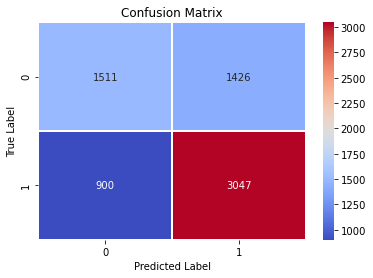

array([[1511, 1426],
       [ 900, 3047]], dtype=int64)

In [ ]:
labels = ["0", "1"]
show_confusion_matrix(y_test, yhat >= 0.5)

In [ ]:
print(metrics.classification_report(y_test, yhat >= 0.5))

              precision    recall  f1-score   support

         0.0       0.63      0.51      0.57      2937
         1.0       0.68      0.77      0.72      3947

    accuracy                           0.66      6884
   macro avg       0.65      0.64      0.64      6884
weighted avg       0.66      0.66      0.66      6884



In [ ]:
metrics.roc_auc_score(y_test, yhat)

0.7076822891394049